In [1]:
import sys
sys.path.append("../")

import torch

from tdoa.visualization import plot_mics_and_sources
from neural_tdoa.model import TdoaCrnn10
from neural_tdoa.utils.load_config import load_config
from datasets.dataset import TdoaDataset


def load_model():
    model = TdoaCrnn10()
    
    weights = torch.load("../tests/fixtures/weights.pth",
                         map_location=torch.device('cpu'))
    #breakpoint()
    model.load_state_dict(weights)
    model.eval()

    return model

def eval_model(model, x):
    with torch.no_grad():
        return model(x)

model = load_model()
config = load_config()
dataset = TdoaDataset(config["validation_dataset"])

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 39.12it/s]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

output_dicts = []

def error(y_gt, y_pred):
    return np.sqrt((y_gt - y_pred)**2)
for sample in dataset:
    x,y = sample
    prediction = float(eval_model(model, x.unsqueeze(0)).numpy())
    gt = float(y["target"].numpy())
    error_val = error(gt, prediction)
    print(f"ground_truth: {gt} prediction: {prediction}, error: {error_val}")
    
    y["prediction"] = prediction
    y["error"] = error_val
    output_dicts.append(y)
    
#     room_dims = eval(sample[0]["room_dims"])
#     mics = eval(sample[0]["mic_coordinates"])
#     sources = [eval(sample[0]["source_coordinates"])]
#     plot_mics_and_sources(room_dims, mics, sources)
#     plt.show()

output_dicts.sort(key=lambda x: x["error"], reverse=True)


ground_truth: 0.5970332622528076 prediction: 0.8782066702842712, error: 0.2811734080314636
ground_truth: 0.21108096837997437 prediction: 0.10474445670843124, error: 0.10633651167154312
ground_truth: 0.12016064673662186 prediction: 0.10254144668579102, error: 0.01761920005083084
ground_truth: 0.278129905462265 prediction: 0.1763649582862854, error: 0.10176494717597961
ground_truth: 2.7347918148734607e-05 prediction: 0.10703673213720322, error: 0.10700938421905448
ground_truth: 0.46659037470817566 prediction: 0.38874244689941406, error: 0.0778479278087616
ground_truth: 0.053565770387649536 prediction: 0.11131883412599564, error: 0.0577530637383461
ground_truth: 0.09100435674190521 prediction: 0.09812068939208984, error: 0.007116332650184631
ground_truth: 0.4110119938850403 prediction: 0.1480942815542221, error: 0.2629177123308182
ground_truth: 0.12948861718177795 prediction: 0.10039376467466354, error: 0.02909485250711441
ground_truth: 0.821311891078949 prediction: 0.9136114120483398, er

ground_truth: 0.4134994447231293 prediction: 0.593440592288971, error: 0.17994114756584167
ground_truth: 0.031526435166597366 prediction: 0.0941668227314949, error: 0.06264038756489754
ground_truth: 0.005943275988101959 prediction: 0.1105535477399826, error: 0.10461027175188065
ground_truth: 0.0014500264078378677 prediction: 0.11067331582307816, error: 0.10922328941524029
ground_truth: 0.7938322424888611 prediction: 0.9126238822937012, error: 0.11879163980484009
ground_truth: 0.4195117652416229 prediction: 0.4115544855594635, error: 0.007957279682159424
ground_truth: 0.652351975440979 prediction: 0.7770456075668335, error: 0.12469363212585449
ground_truth: 0.33809036016464233 prediction: 0.12736454606056213, error: 0.2107258141040802
ground_truth: 0.9803110361099243 prediction: 0.8926964402198792, error: 0.08761459589004517
ground_truth: 0.1373060941696167 prediction: 0.09284443408250809, error: 0.04446166008710861
ground_truth: 0.6172451376914978 prediction: 0.7915711998939514, error:

Error mean: 0.12206146229878868 Error std: 0.07969642897225346
Prediction 0.5749021768569946, Error: 0.3755863755941391, delay_in_ms: 1.7815486192703247


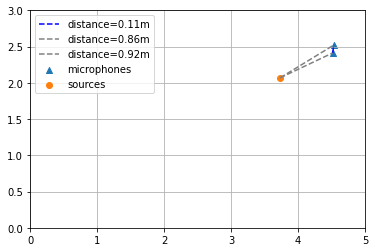

Prediction 0.9091358184814453, Error: 0.33819907903671265, delay_in_ms: 4.498445510864258


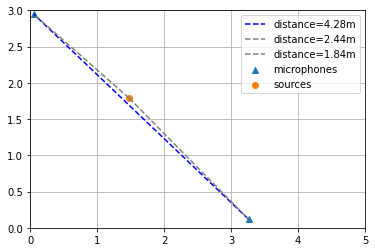

Prediction 0.7523885369300842, Error: 0.3034341633319855, delay_in_ms: 1.6738344430923462


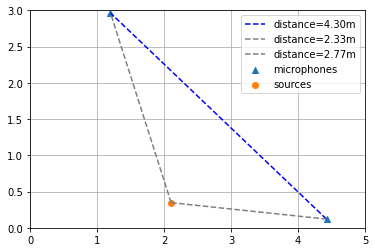

Prediction 0.7217005491256714, Error: 0.2867524027824402, delay_in_ms: 4.161722660064697


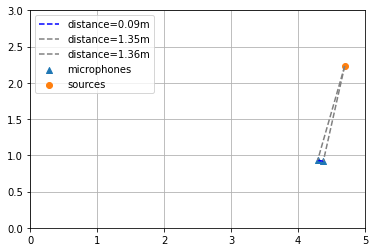

Prediction 0.8905776143074036, Error: 0.2864823341369629, delay_in_ms: 9.880305290222168


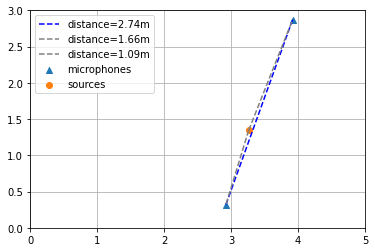

Prediction 0.8782066702842712, Error: 0.2811734080314636, delay_in_ms: 6.51593017578125


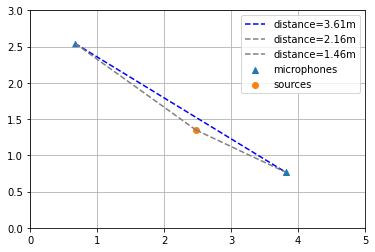

Prediction 0.1480942815542221, Error: 0.2629177123308182, delay_in_ms: 5.022385597229004


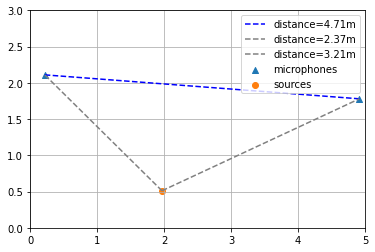

Prediction 0.6814087629318237, Error: 0.2625078558921814, delay_in_ms: 9.799529075622559


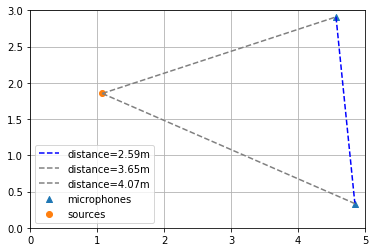

Prediction 0.852541983127594, Error: 0.24655652046203613, delay_in_ms: 0.20818108320236206


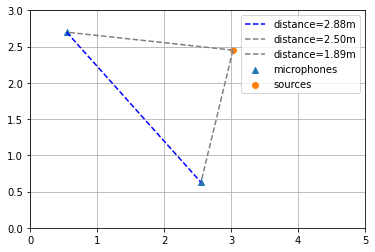

Prediction 0.8783259987831116, Error: 0.2446160912513733, delay_in_ms: 9.060843467712402


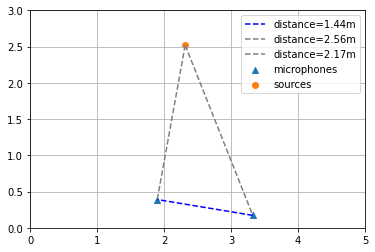

Prediction 0.9064313769340515, Error: 0.2376997470855713, delay_in_ms: 3.1180202960968018


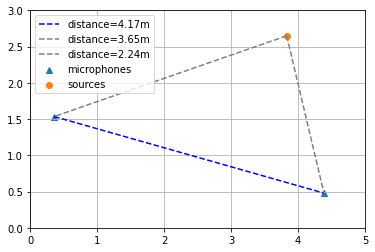

Prediction 0.6453321576118469, Error: 0.23547473549842834, delay_in_ms: 5.265923023223877


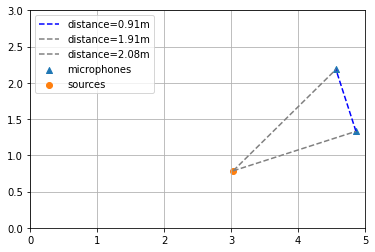

Prediction 0.82129967212677, Error: 0.21130049228668213, delay_in_ms: 5.571774959564209


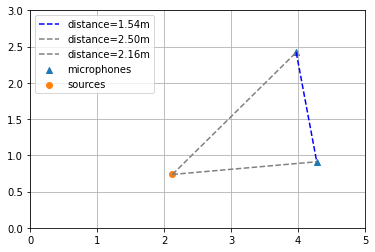

Prediction 0.12736454606056213, Error: 0.2107258141040802, delay_in_ms: 1.2004464864730835


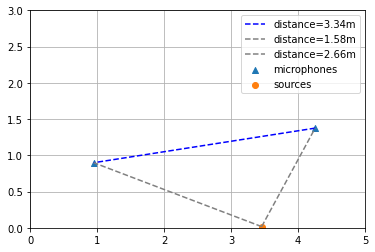

Prediction 0.09942474961280823, Error: 0.2058905065059662, delay_in_ms: 8.677810668945312


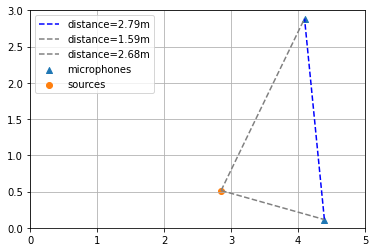

Prediction 0.5510266423225403, Error: 0.2044885754585266, delay_in_ms: 6.2003374099731445


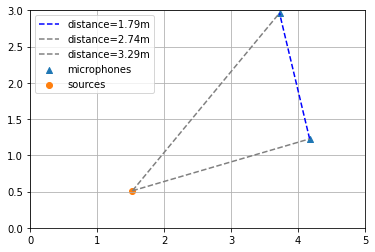

Prediction 0.9127094745635986, Error: 0.1975424885749817, delay_in_ms: 9.848958969116211


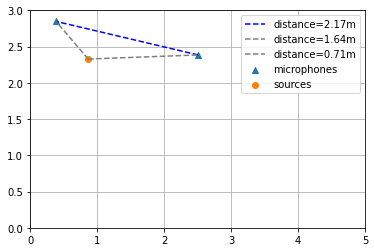

Prediction 0.1151961013674736, Error: 0.1896250918507576, delay_in_ms: 7.17153263092041


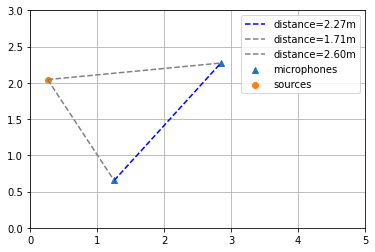

Prediction 0.19705891609191895, Error: 0.18891814909875393, delay_in_ms: 4.019237041473389


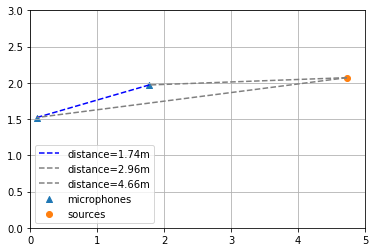

Prediction 0.844986081123352, Error: 0.18377560377120972, delay_in_ms: 0.20374028384685516


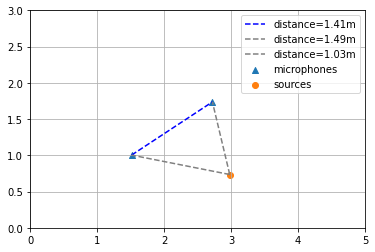

Prediction 0.593440592288971, Error: 0.17994114756584167, delay_in_ms: 3.6157777309417725


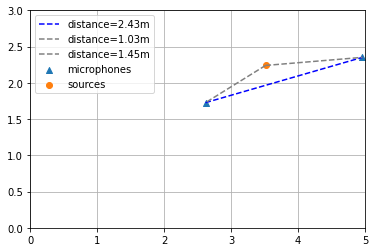

Prediction 0.9087020754814148, Error: 0.17786139249801636, delay_in_ms: 4.932610511779785


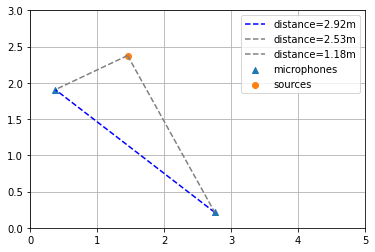

Prediction 0.18249085545539856, Error: 0.17694455152377486, delay_in_ms: 4.9229912757873535


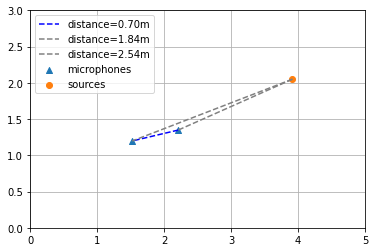

Prediction 0.7915711998939514, Error: 0.1743260622024536, delay_in_ms: 9.365230560302734


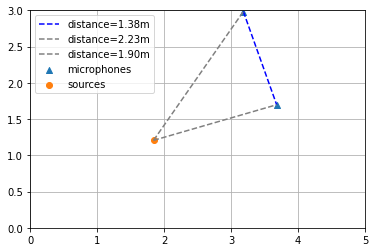

Prediction 0.10210376977920532, Error: 0.1731148660182953, delay_in_ms: 9.755945205688477


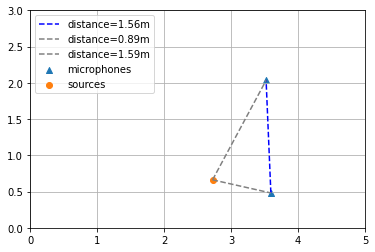

Prediction 0.9156215786933899, Error: 0.1697319746017456, delay_in_ms: 9.222892761230469


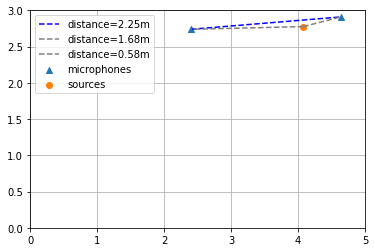

Prediction 0.16583411395549774, Error: 0.16441012918949127, delay_in_ms: 5.799327373504639


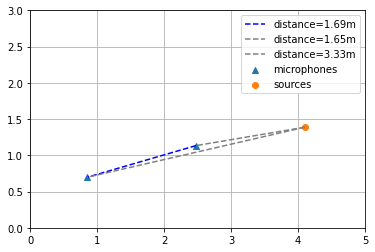

Prediction 0.8322429656982422, Error: 0.16228914260864258, delay_in_ms: 2.6458325386047363


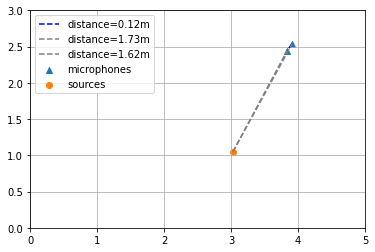

Prediction 0.1100955381989479, Error: 0.15532603114843369, delay_in_ms: 3.438498020172119


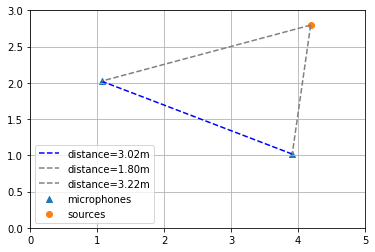

Prediction 0.0912376344203949, Error: 0.15400414168834686, delay_in_ms: 0.8323413729667664


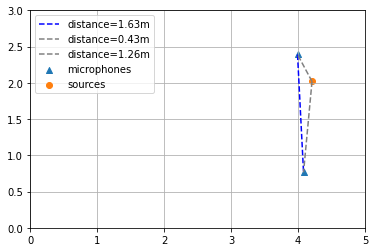

Prediction 0.9106635451316833, Error: 0.15277397632598877, delay_in_ms: 7.522085189819336


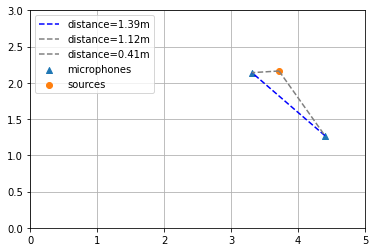

Prediction 0.8758942484855652, Error: 0.15209800004959106, delay_in_ms: 4.166838645935059


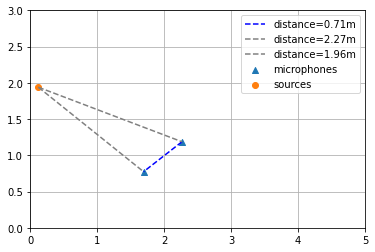

Prediction 0.1572512984275818, Error: 0.15161696402356029, delay_in_ms: 8.556977272033691


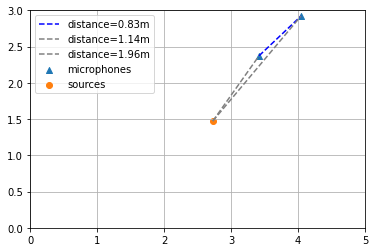

Prediction 0.15822550654411316, Error: 0.14967589359730482, delay_in_ms: 3.703518867492676


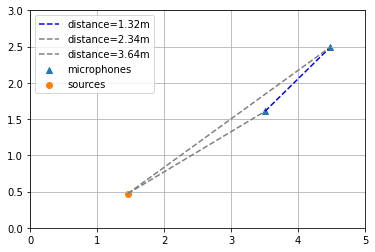

Prediction 0.4936237335205078, Error: 0.14632853865623474, delay_in_ms: 1.7721126079559326


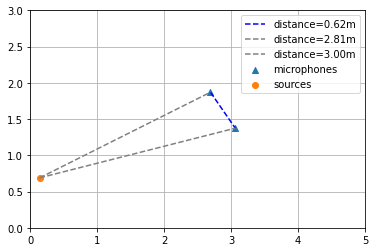

Prediction 0.41970983147621155, Error: 0.1425049901008606, delay_in_ms: 2.0085301399230957


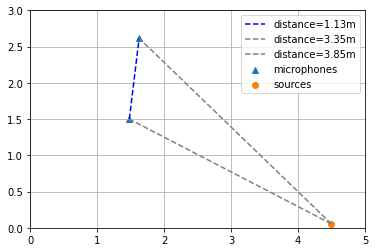

Prediction 0.17406970262527466, Error: 0.13444726541638374, delay_in_ms: 3.0549588203430176


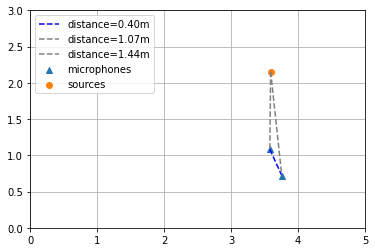

Prediction 0.19573388993740082, Error: 0.1310347244143486, delay_in_ms: 4.01082181930542


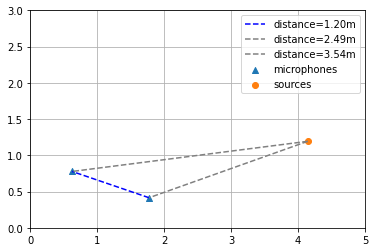

Prediction 0.1274643987417221, Error: 0.12736145513190422, delay_in_ms: 2.9832098484039307


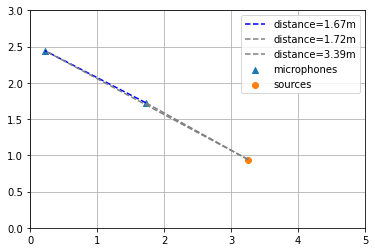

Prediction 0.9120001792907715, Error: 0.12600493431091309, delay_in_ms: 9.243077278137207


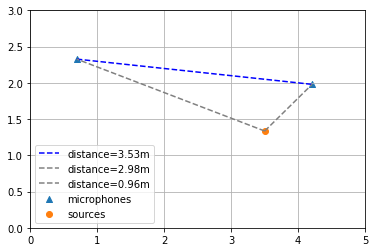

Prediction 0.10155350714921951, Error: 0.12563534826040268, delay_in_ms: 1.8990086317062378


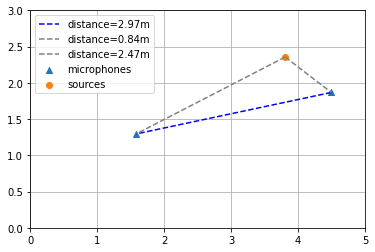

Prediction 0.7770456075668335, Error: 0.12469363212585449, delay_in_ms: 7.9623188972473145


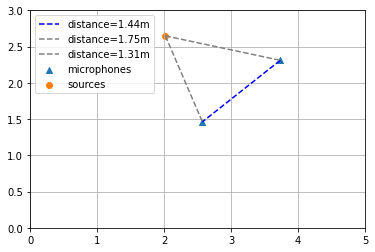

Prediction 0.9126238822937012, Error: 0.11879163980484009, delay_in_ms: 8.654932975769043


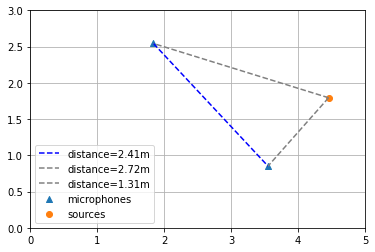

Prediction 0.7527267932891846, Error: 0.11706465482711792, delay_in_ms: 2.752253532409668


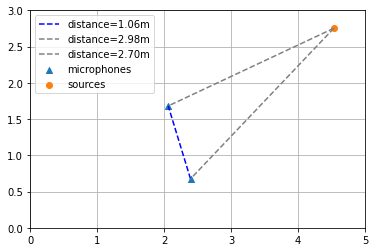

Prediction 0.9119601249694824, Error: 0.11404931545257568, delay_in_ms: 9.59424114227295


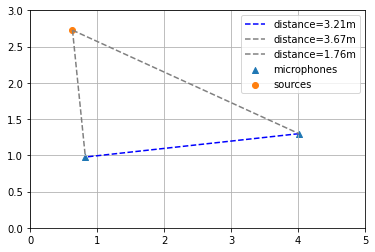

Prediction 0.6638979911804199, Error: 0.11342620849609375, delay_in_ms: 0.5878511667251587


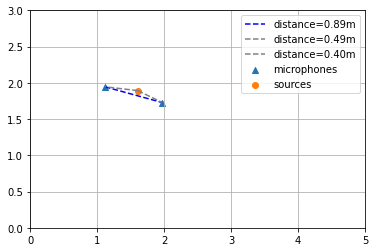

Prediction 0.9025440216064453, Error: 0.11223679780960083, delay_in_ms: 6.9263691902160645


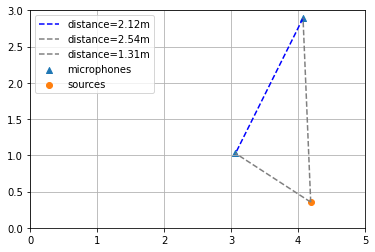

Prediction 0.13039033114910126, Error: 0.11207884550094604, delay_in_ms: 7.326061725616455


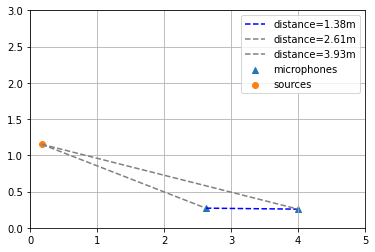

Prediction 0.3690064251422882, Error: 0.10979601740837097, delay_in_ms: 6.039825439453125


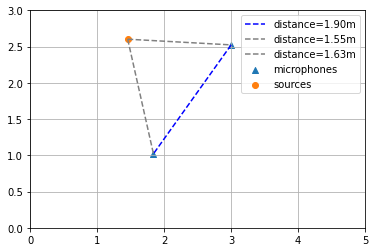

Prediction 0.11048685014247894, Error: 0.10935564909595996, delay_in_ms: 2.430917263031006


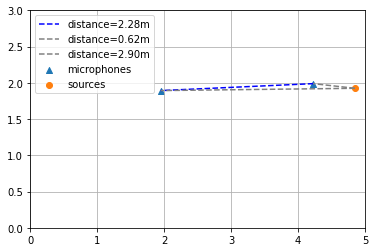

Prediction 0.11067331582307816, Error: 0.10922328941524029, delay_in_ms: 1.7336726188659668


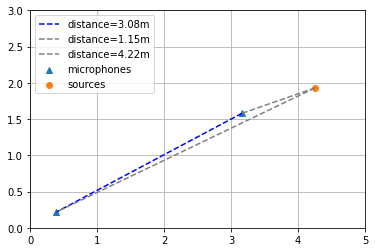

Prediction 0.10703673213720322, Error: 0.10700938421905448, delay_in_ms: 1.2088994979858398


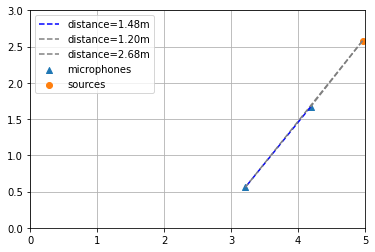

Prediction 0.10474445670843124, Error: 0.10633651167154312, delay_in_ms: 7.215400218963623


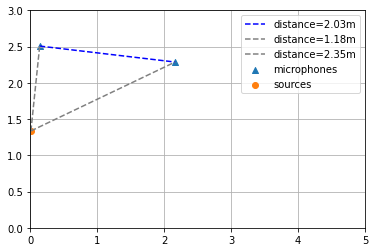

Prediction 0.1105535477399826, Error: 0.10461027175188065, delay_in_ms: 2.657292127609253


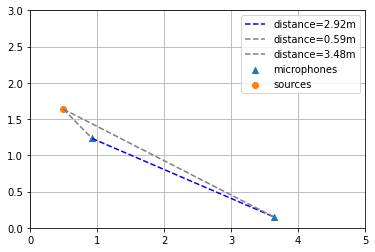

Prediction 0.1763649582862854, Error: 0.10176494717597961, delay_in_ms: 4.596034526824951


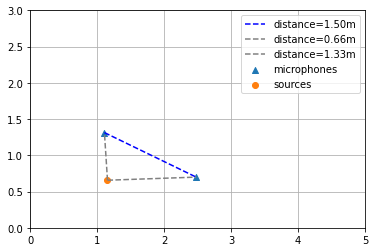

Prediction 0.11045327037572861, Error: 0.10053972154855728, delay_in_ms: 3.532275676727295


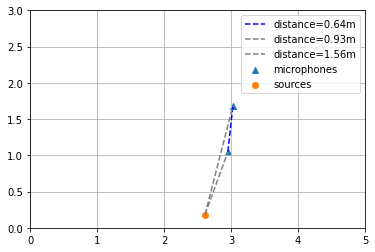

Prediction 0.10471173375844955, Error: 0.09594547096639872, delay_in_ms: 5.492699146270752


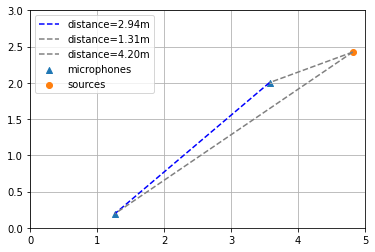

Prediction 0.09328797459602356, Error: 0.09285782763618045, delay_in_ms: 5.102808952331543


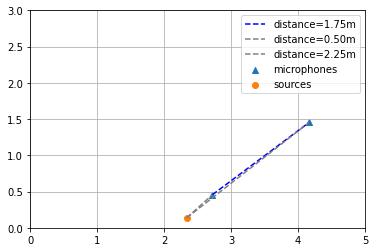

Prediction 0.9136114120483398, Error: 0.09229952096939087, delay_in_ms: 8.091399192810059


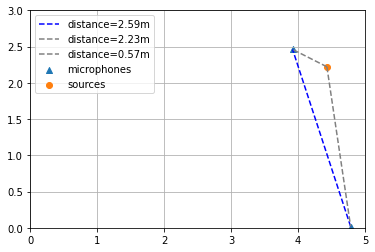

Prediction 0.11413032561540604, Error: 0.09030213207006454, delay_in_ms: 8.130558013916016


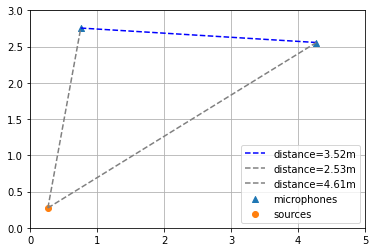

Prediction 0.8926964402198792, Error: 0.08761459589004517, delay_in_ms: 5.420405864715576


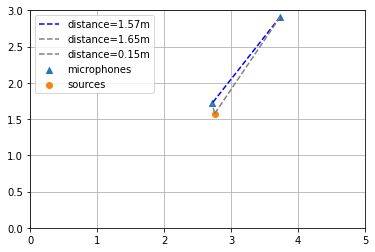

Prediction 0.11689486354589462, Error: 0.08735907822847366, delay_in_ms: 4.849250793457031


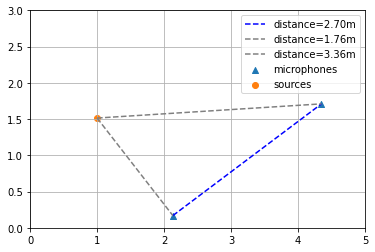

Prediction 0.9091074466705322, Error: 0.08471173048019409, delay_in_ms: 7.338307857513428


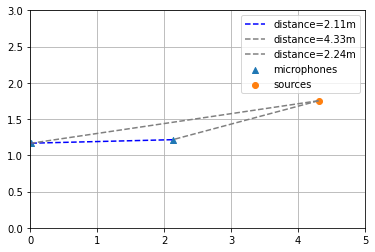

Prediction 0.1023583635687828, Error: 0.08276202529668808, delay_in_ms: 6.096663475036621


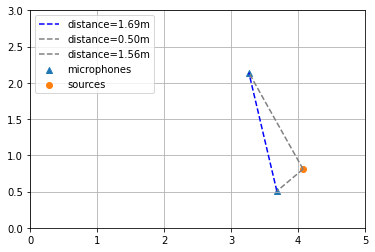

Prediction 0.09870342165231705, Error: 0.08161732368171215, delay_in_ms: 7.88116455078125


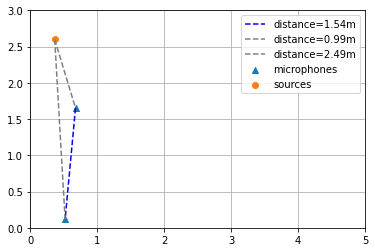

Prediction 0.09649410843849182, Error: 0.08046743273735046, delay_in_ms: 1.941186547279358


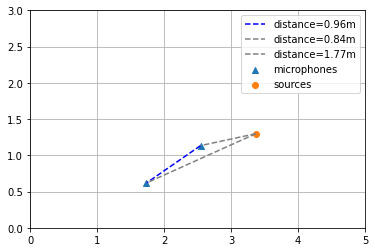

Prediction 0.9135371446609497, Error: 0.07811444997787476, delay_in_ms: 6.3751301765441895


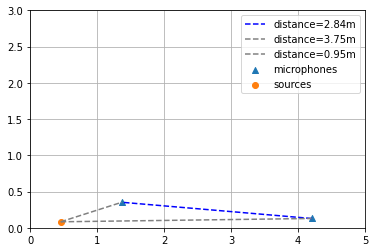

Prediction 0.38874244689941406, Error: 0.0778479278087616, delay_in_ms: 5.875805854797363


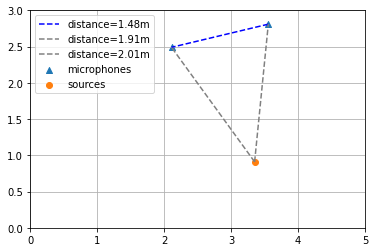

Prediction 0.8896926045417786, Error: 0.07571566104888916, delay_in_ms: 6.2926201820373535


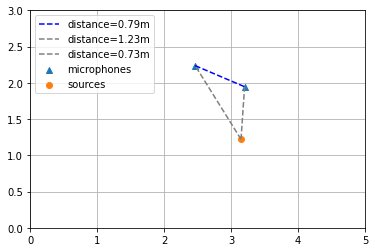

Prediction 0.1001405194401741, Error: 0.07048231549561024, delay_in_ms: 1.8983869552612305


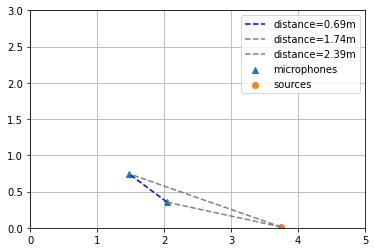

Prediction 0.10841444134712219, Error: 0.06963428854942322, delay_in_ms: 6.704116344451904


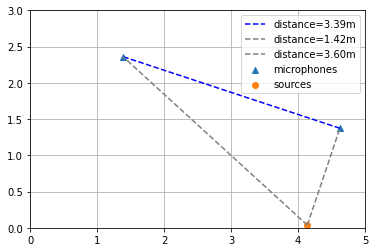

Prediction 0.09546467661857605, Error: 0.06878677010536194, delay_in_ms: 3.275644540786743


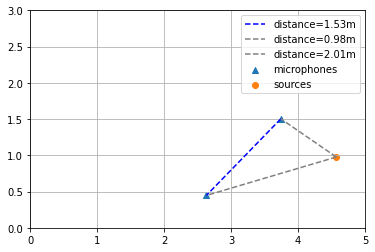

Prediction 0.5786465406417847, Error: 0.0658983588218689, delay_in_ms: 1.5962551832199097


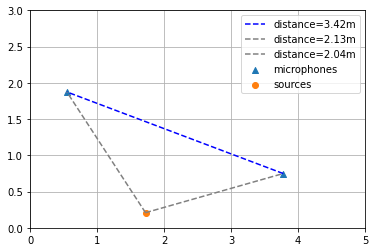

Prediction 0.0941668227314949, Error: 0.06264038756489754, delay_in_ms: 6.872422218322754


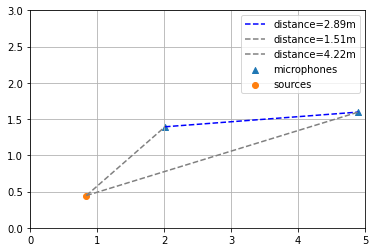

Prediction 0.1911640465259552, Error: 0.06081394851207733, delay_in_ms: 3.167351484298706


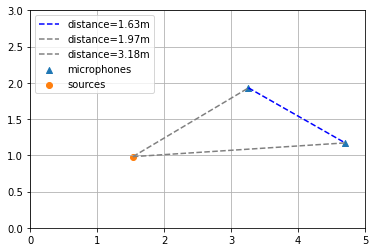

Prediction 0.1790734976530075, Error: 0.05981231480836868, delay_in_ms: 2.7322568893432617


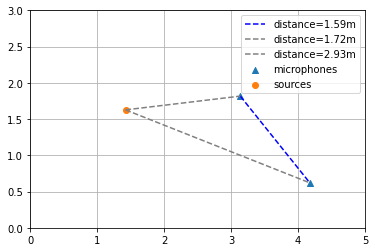

Prediction 0.9128533005714417, Error: 0.058264851570129395, delay_in_ms: 3.8655710220336914


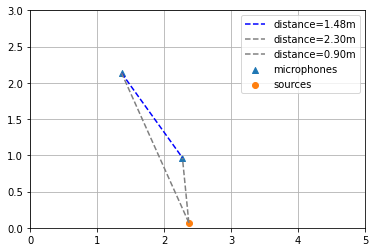

Prediction 0.11131883412599564, Error: 0.0577530637383461, delay_in_ms: 1.7300740480422974


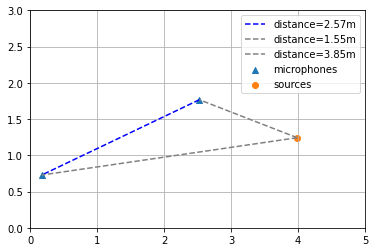

Prediction 0.10823836922645569, Error: 0.05635667219758034, delay_in_ms: 8.575878143310547


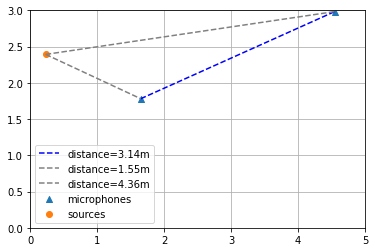

Prediction 0.9097990989685059, Error: 0.055681586265563965, delay_in_ms: 7.076473712921143


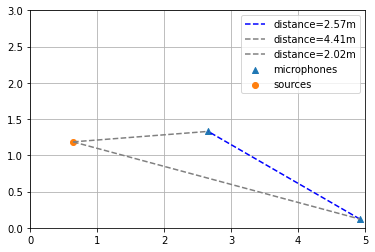

Prediction 0.9107227325439453, Error: 0.05551654100418091, delay_in_ms: 3.5681874752044678


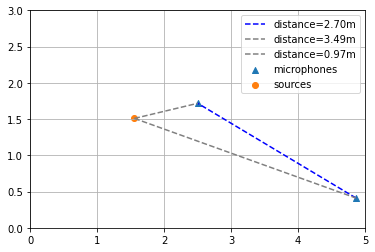

Prediction 0.9036206603050232, Error: 0.048548221588134766, delay_in_ms: 9.109877586364746


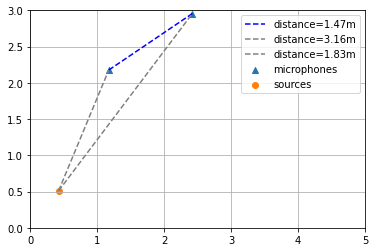

Prediction 0.8482171297073364, Error: 0.04654252529144287, delay_in_ms: 5.109601974487305


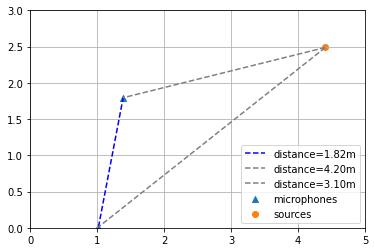

Prediction 0.9060720205307007, Error: 0.045263707637786865, delay_in_ms: 2.667236328125


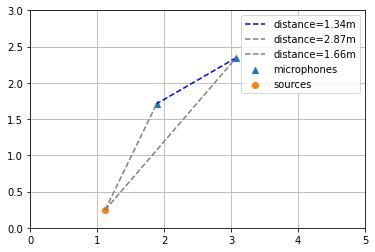

Prediction 0.09284443408250809, Error: 0.04446166008710861, delay_in_ms: 5.499944686889648


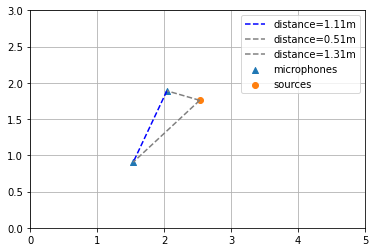

Prediction 0.10368800908327103, Error: 0.0414636954665184, delay_in_ms: 5.231977939605713


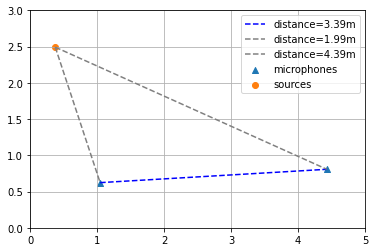

Prediction 0.9123432040214539, Error: 0.03675436973571777, delay_in_ms: 7.3142194747924805


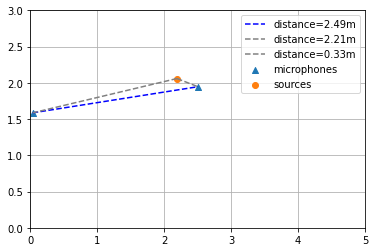

Prediction 0.914383053779602, Error: 0.034552931785583496, delay_in_ms: 9.600788116455078


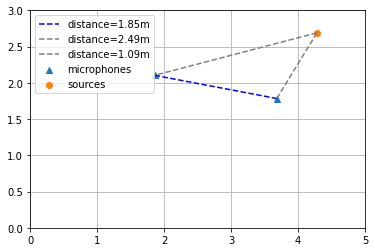

Prediction 0.10039376467466354, Error: 0.02909485250711441, delay_in_ms: 4.591317176818848


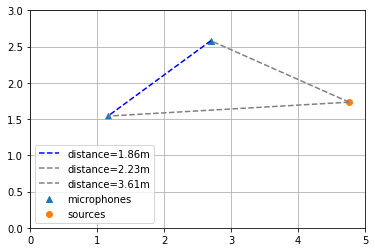

Prediction 0.10390791296958923, Error: 0.027205660939216614, delay_in_ms: 7.066903114318848


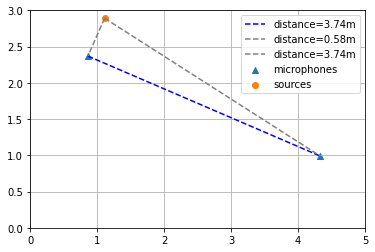

Prediction 0.9123058915138245, Error: 0.02708148956298828, delay_in_ms: 9.104817390441895


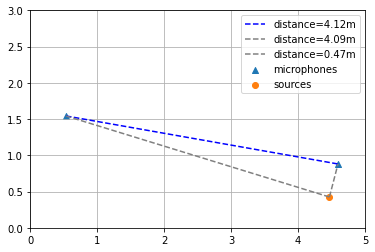

Prediction 0.2766052782535553, Error: 0.026063114404678345, delay_in_ms: 9.136798858642578


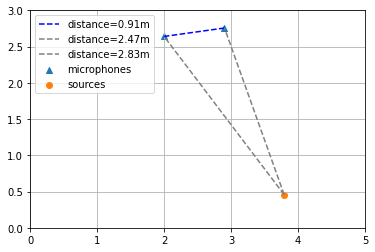

Prediction 0.8688854575157166, Error: 0.02537667751312256, delay_in_ms: 2.5341012477874756


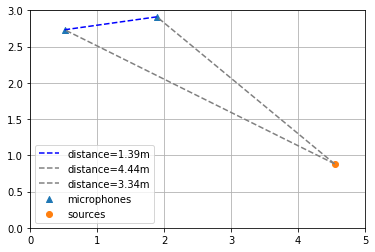

Prediction 0.8977065682411194, Error: 0.02301126718521118, delay_in_ms: 2.8078672885894775


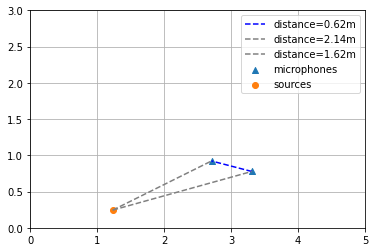

Prediction 0.256998747587204, Error: 0.02152194082736969, delay_in_ms: 2.1655778884887695


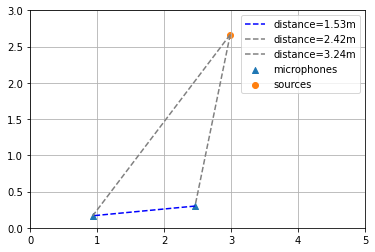

Prediction 0.10254144668579102, Error: 0.01761920005083084, delay_in_ms: 2.1659939289093018


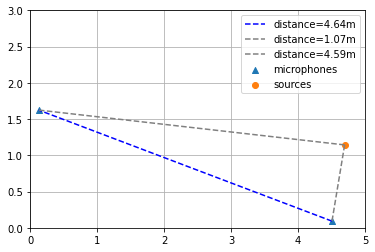

Prediction 0.4115544855594635, Error: 0.007957279682159424, delay_in_ms: 9.981599807739258


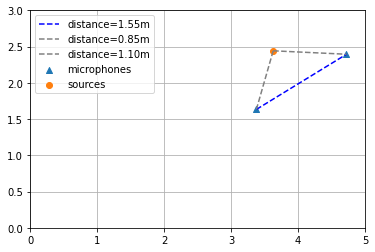

Prediction 0.09812068939208984, Error: 0.007116332650184631, delay_in_ms: 3.9325509071350098


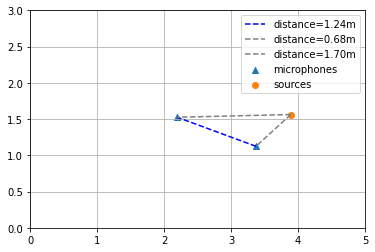

Prediction 0.12098885327577591, Error: 0.004722237586975098, delay_in_ms: 2.675262451171875


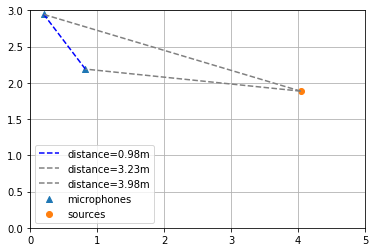

Prediction 0.9155408143997192, Error: 0.0004572272300720215, delay_in_ms: 5.452870845794678


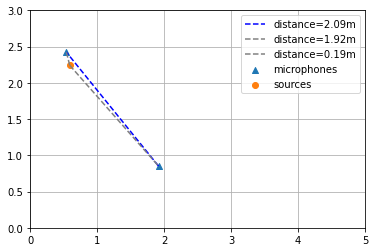

In [5]:

errors = [d["error"] for d in output_dicts]
avg_error = np.mean(errors)
std_error = np.std(errors)
print(f"Error mean: {avg_error} Error std: {std_error}")

for d in output_dicts:
    delay_in_ms = d['mic_delays'][1]*1000
    print(f"Prediction {d['prediction']}, Error: {d['error']}, delay_in_ms: {delay_in_ms}")
    room_dims = d["room_dims"]
    mics = d["mic_coordinates"]
    sources = [d["source_coordinates"]]
    plot_mics_and_sources(room_dims, mics, sources)
    plt.show()

In [4]:
output_dicts[0]

{'Unnamed: 0': 0,
 'room_dims': tensor([5., 3., 3.]),
 'source_x': 2.4771754354597046,
 'source_y': 1.3484731943662145,
 'source_coordinates': tensor([2.4772, 1.3485, 1.0000]),
 'mic_coordinates': tensor([[0.6718, 2.5423, 1.0000],
         [3.8189, 0.7652, 1.0000]]),
 'mic_delays': tensor([0.0000, 0.0065]),
 'mic_gains': tensor([1., 1.]),
 'mic_sampling_rates': tensor([16000.,    16.]),
 'tdoa': 0.0020448487964534,
 'normalized_tdoa': 0.5970332327473894,
 'sr': 16000,
 'source_gain': 0.417022004702574,
 'trim_beginning': True,
 'signals_dir': 'validation_dataset\\samples\\0',
 'target': tensor([0.5970]),
 'prediction': 0.8782066702842712,
 'error': 0.2811734080314636}